In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("Kolkata_rent.csv")

In [ ]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,2,BHK,Independent Floor,Sodepur,"6,000",600,Unfurnished,1 bathrooms
1,OWNER,1,RK,Studio Apartment,south dum dum,"4,000",150,Semi-Furnished,1 bathrooms
2,OWNER,1,RK,Studio Apartment,Sector 22,"6,500",350,Semi-Furnished,1 bathrooms
3,OWNER,9,BHK,Independent House,Lake Gardens,1.5,6500,Unfurnished,6 bathrooms
4,OWNER,3,BHK,Independent House,Dhapa,"26,000",1200,Furnished,2 bathrooms


In [ ]:
df.property_type.unique()

array(['Independent Floor', 'Studio Apartment', 'Independent House',
       'Apartment', 'Villa'], dtype=object)

In [ ]:
df1=df.drop(["seller_type", "layout_type"], axis="columns")
df1.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,2,Independent Floor,Sodepur,"6,000",600,Unfurnished,1 bathrooms
1,1,Studio Apartment,south dum dum,"4,000",150,Semi-Furnished,1 bathrooms
2,1,Studio Apartment,Sector 22,"6,500",350,Semi-Furnished,1 bathrooms
3,9,Independent House,Lake Gardens,1.5,6500,Unfurnished,6 bathrooms
4,3,Independent House,Dhapa,"26,000",1200,Furnished,2 bathrooms


In [ ]:
df1.shape

(9900, 7)

In [ ]:
df1.isnull().sum()

,0
bedroom,0
property_type,0
locality,0
price,0
area,0
furnish_type,0
bathroom,221


In [ ]:
df2=df1.dropna()
df2.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,2,Independent Floor,Sodepur,"6,000",600,Unfurnished,1 bathrooms
1,1,Studio Apartment,south dum dum,"4,000",150,Semi-Furnished,1 bathrooms
2,1,Studio Apartment,Sector 22,"6,500",350,Semi-Furnished,1 bathrooms
3,9,Independent House,Lake Gardens,1.5,6500,Unfurnished,6 bathrooms
4,3,Independent House,Dhapa,"26,000",1200,Furnished,2 bathrooms


In [ ]:
df2.shape

(9679, 7)

In [ ]:
df2.isnull().sum()

,0
bedroom,0
property_type,0
locality,0
price,0
area,0
furnish_type,0
bathroom,0


In [ ]:
df2.bedroom.unique()

array([ 2,  1,  9,  3,  4,  5, 10,  6,  7, 15, 12])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9679 entries, 0 to 9899
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedroom        9679 non-null   int64 
 1   property_type  9679 non-null   object
 2   locality       9679 non-null   object
 3   price          9679 non-null   object
 4   area           9679 non-null   int64 
 5   furnish_type   9679 non-null   object
 6   bathroom       9679 non-null   object
dtypes: int64(2), object(5)
memory usage: 604.9+ KB


In [ ]:
df2.bathroom.unique()

array(['1 bathrooms', '6 bathrooms', '2 bathrooms', '3 bathrooms',
       '5 bathrooms', '4 bathrooms', 'SouthWest facing', 'South facing',
       '9 bathrooms', 'East facing', '7 bathrooms', 'SouthEast facing',
       'NorthWest facing', '16 bathrooms', '8 bathrooms',
       'NorthEast facing'], dtype=object)

In [ ]:
values_to_remove = [
    'NorthEast facing',
    'NorthWest facing',
    'SouthEast facing',
    'South facing',
    'SouthWest facing',
    'East facing'
]

df2_cleaned = df2[~df2['bathroom'].isin(values_to_remove)]

df3 = df2_cleaned
df3.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,2,Independent Floor,Sodepur,"6,000",600,Unfurnished,1 bathrooms
1,1,Studio Apartment,south dum dum,"4,000",150,Semi-Furnished,1 bathrooms
2,1,Studio Apartment,Sector 22,"6,500",350,Semi-Furnished,1 bathrooms
3,9,Independent House,Lake Gardens,1.5,6500,Unfurnished,6 bathrooms
4,3,Independent House,Dhapa,"26,000",1200,Furnished,2 bathrooms


In [ ]:
df3.shape

(9665, 7)

In [ ]:
df3.bathroom.unique()

array(['1 bathrooms', '6 bathrooms', '2 bathrooms', '3 bathrooms',
       '5 bathrooms', '4 bathrooms', '9 bathrooms', '7 bathrooms',
       '16 bathrooms', '8 bathrooms'], dtype=object)

In [ ]:
df3['bathroom_numeric'] = df3['bathroom'].str.extract(r'(\d+)')
df3['bathroom_numeric'] = pd.to_numeric(df3['bathroom_numeric'])

df3.head()

<ipython-input-92-705e15d1114a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bathroom_numeric'] = df3['bathroom'].str.extract(r'(\d+)')
<ipython-input-92-705e15d1114a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bathroom_numeric'] = pd.to_numeric(df3['bathroom_numeric'])


,bedroom,property_type,locality,price,area,furnish_type,bathroom,bathroom_numeric
0,2,Independent Floor,Sodepur,"6,000",600,Unfurnished,1 bathrooms,1
1,1,Studio Apartment,south dum dum,"4,000",150,Semi-Furnished,1 bathrooms,1
2,1,Studio Apartment,Sector 22,"6,500",350,Semi-Furnished,1 bathrooms,1
3,9,Independent House,Lake Gardens,1.5,6500,Unfurnished,6 bathrooms,6
4,3,Independent House,Dhapa,"26,000",1200,Furnished,2 bathrooms,2


In [ ]:
df4=df3.drop(["bathroom"], axis="columns")

In [ ]:
df4.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom_numeric
0,2,Independent Floor,Sodepur,"6,000",600,Unfurnished,1
1,1,Studio Apartment,south dum dum,"4,000",150,Semi-Furnished,1
2,1,Studio Apartment,Sector 22,"6,500",350,Semi-Furnished,1
3,9,Independent House,Lake Gardens,1.5,6500,Unfurnished,6
4,3,Independent House,Dhapa,"26,000",1200,Furnished,2


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9665 entries, 0 to 9899
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bedroom           9665 non-null   int64 
 1   property_type     9665 non-null   object
 2   locality          9665 non-null   object
 3   price             9665 non-null   object
 4   area              9665 non-null   int64 
 5   furnish_type      9665 non-null   object
 6   bathroom_numeric  9665 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 604.1+ KB


In [ ]:
df4.price.unique()

array(['6,000', '4,000', '6,500', '1.5', '26,000', '10,000', '8,000',
       '16,000', '22,000', '12,000', '9,000', '10,500', '40,000',
       '17,000', '11,000', '11,300', '15,000', '14,000', '18,000',
       '20,000', '14,500', '7,000', '45,000', '9,500', '30,000', '13,000',
       '25,000', '7,560', '8,500', '2,500', '5,000', '6,400', '17,500',
       '50,000', '5,500', '55,000', '23,000', '27,500', '24,500', '4,500',
       '13,500', '28,000', '24,000', '7,500', '16,500', '25,500',
       '23,500', '15,500', '27,000', '35,000', '5', '12,500', '19,000',
       '5,200', '11,500', '42,000', '12,800', '33,000', '32,000',
       '21,000', '19,800', '15,750', '29,000', '34,000', '10,800',
       '60,000', '5,800', '1.6', '1.2', '2.3', '1.65', '90,000', '46,000',
       '1.8', '83,500', '70,000', '1', '80,000', '2.5', '2.75', '1.25',
       '2.2', '2.97', '3.5', '65,000', '95,000', '1.24', '22,500',
       '19,550', '38,000', '1.35', '36,000', '19,600', '29,400', '15,950',
       '75,000'

In [ ]:
df4['price'] = df4['price'].str.replace(',', '', regex=True)
df4['price'] = pd.to_numeric(df4['price'])
df4.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom_numeric
0,2,Independent Floor,Sodepur,6000.0,600,Unfurnished,1
1,1,Studio Apartment,south dum dum,4000.0,150,Semi-Furnished,1
2,1,Studio Apartment,Sector 22,6500.0,350,Semi-Furnished,1
3,9,Independent House,Lake Gardens,1.5,6500,Unfurnished,6
4,3,Independent House,Dhapa,26000.0,1200,Furnished,2


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9665 entries, 0 to 9899
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedroom           9665 non-null   int64  
 1   property_type     9665 non-null   object 
 2   locality          9665 non-null   object 
 3   price             9665 non-null   float64
 4   area              9665 non-null   int64  
 5   furnish_type      9665 non-null   object 
 6   bathroom_numeric  9665 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 604.1+ KB


In [ ]:
df4.shape

(9665, 7)

In [ ]:
filtered_rows = df4[df4['bedroom'] < df4['bathroom_numeric']]
filtered_rows

,bedroom,property_type,locality,price,area,furnish_type,bathroom_numeric
45,1,Independent Floor,Kamdahari,8000.0,650,Semi-Furnished,2
75,1,Apartment,Dum Dum,15000.0,760,Furnished,2
85,1,Studio Apartment,Shibpur,30000.0,1200,Unfurnished,2
94,1,Independent House,Ichhapur Defence Estate,6000.0,1440,Unfurnished,2
136,1,Apartment,Sodepur,6000.0,600,Unfurnished,2
...,...,...,...,...,...,...,...
9462,1,Apartment,Ballygunge,40000.0,1400,Semi-Furnished,2
9576,1,Apartment,New Town,10000.0,500,Unfurnished,2
9641,2,Independent House,Dhakuria,10000.0,900,Furnished,4
9718,1,Independent Floor,Behala,7000.0,900,Semi-Furnished,2


In [ ]:
df5=df4[~df4.isin(filtered_rows).any(axis=1)]

In [ ]:
df5.shape

(9448, 7)

In [ ]:
df5.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom_numeric
0,2,Independent Floor,Sodepur,6000.0,600,Unfurnished,1
1,1,Studio Apartment,south dum dum,4000.0,150,Semi-Furnished,1
2,1,Studio Apartment,Sector 22,6500.0,350,Semi-Furnished,1
3,9,Independent House,Lake Gardens,1.5,6500,Unfurnished,6
4,3,Independent House,Dhapa,26000.0,1200,Furnished,2


In [ ]:
prices_big = df5[(df5['price'] < 1000) & (df5['area'] > 1000)]
prices_big.describe()

,bedroom,price,area,bathroom_numeric
count,145.000000,145.000000,145.000000,145.000000
mean,4.275862,1.748069,3780.855172,3.689655
std,1.617967,1.081779,1573.441332,1.592156
min,1.000000,1.000000,1500.000000,1.000000
25%,3.000000,1.110000,2822.000000,3.000000
50%,4.000000,1.500000,3300.000000,4.000000
75%,5.000000,1.800000,4365.000000,4.000000
max,12.000000,7.500000,13000.000000,9.000000


In [ ]:
mask = (df5['price'] < 1000) & (df5['area'] > 1000)
df5.loc[mask, 'price'] = df5.loc[mask, 'price'] * 100000

In [ ]:
df5.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom_numeric
0,2,Independent Floor,Sodepur,6000.0,600,Unfurnished,1
1,1,Studio Apartment,south dum dum,4000.0,150,Semi-Furnished,1
2,1,Studio Apartment,Sector 22,6500.0,350,Semi-Furnished,1
3,9,Independent House,Lake Gardens,150000.0,6500,Unfurnished,6
4,3,Independent House,Dhapa,26000.0,1200,Furnished,2


In [ ]:
df5.shape

(9448, 7)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9448 entries, 0 to 9899
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedroom           9448 non-null   int64  
 1   property_type     9448 non-null   object 
 2   locality          9448 non-null   object 
 3   price             9448 non-null   float64
 4   area              9448 non-null   int64  
 5   furnish_type      9448 non-null   object 
 6   bathroom_numeric  9448 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 590.5+ KB


In [ ]:
df5.furnish_type.unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [ ]:
df5.locality.value_counts()

,count
locality,
New Town,1853
Kasba,432
Rajarhat,424
Keshtopur,320
Tollygunge,259
...,...
Anandapuri,1
Bhatenda,1
Khalisha Kota,1


In [ ]:
(df5.locality.value_counts()<5).sum()

238

In [ ]:
locality_counts = df5['locality'].value_counts()
low_frequency_localities = locality_counts[locality_counts < 5].index
df5['locality'] = df5['locality'].replace(low_frequency_localities, 'others')

<ipython-input-112-3a6d53417975>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['locality'] = df5['locality'].replace(low_frequency_localities, 'others')


In [ ]:
low_frequency_localities

Index(['Sukanta Nagar', 'Dum Dum Metro', 'Swiss Park', 'Titagarh',
       'Bangur avenue', 'Poddar Nagar', 'Anandapur', 'Metiabruz',
       'Thakurpukur Bazar', 'Kudgat',
       ...
       'Purbachal Road', 'Bidhan Pally', 'Sahid Nagar Road', 'College Square',
       'Ajay Nagar', 'Anandapuri', 'Bhatenda', 'Khalisha Kota', 'Bondal Gate',
       'Banerjee Para Road'],
      dtype='object', name='locality', length=238)

In [ ]:
df5.locality.value_counts()

,count
locality,
New Town,1853
Kasba,432
others,425
Rajarhat,424
Keshtopur,320
...,...
Haridebpur,5
Elgin Road,5
Airport road,5


In [ ]:
df5.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom_numeric
0,2,Independent Floor,Sodepur,6000.0,600,Unfurnished,1
1,1,Studio Apartment,south dum dum,4000.0,150,Semi-Furnished,1
2,1,Studio Apartment,Sector 22,6500.0,350,Semi-Furnished,1
3,9,Independent House,Lake Gardens,150000.0,6500,Unfurnished,6
4,3,Independent House,Dhapa,26000.0,1200,Furnished,2


In [ ]:
df6=pd.get_dummies(df5, columns=['property_type', 'locality' , 'furnish_type'], dtype=int)
df6.head()

,bedroom,price,area,bathroom_numeric,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Studio Apartment,property_type_Villa,locality_Action Area I,...,locality_birati,locality_deshbandhu nagar,locality_kalikapura,locality_others,locality_sahakara nagar,locality_salt lake sec iii,locality_south dum dum,furnish_type_Furnished,furnish_type_Semi-Furnished,furnish_type_Unfurnished
0,2,6000.0,600,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,4000.0,150,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,6500.0,350,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,150000.0,6500,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,26000.0,1200,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df6.shape

(9448, 179)

In [ ]:
min_price_bedroom_2 = df6[df6['bedroom'] == 3]['price'].min()
min_price_bedroom_more_than_2 = df6[df6['bedroom'] > 3]['price'].min()
result_rows = pd.DataFrame()
if min_price_bedroom_2 < min_price_bedroom_more_than_2:
    result_rows = df6[df6['bedroom'] == 3]
result_rows.value_counts()


bedroom  price     area  bathroom_numeric  property_type_Apartment  property_type_Independent Floor  property_type_Independent House  property_type_Studio Apartment  property_type_Villa  locality_Action Area I  locality_Action Area I Newtown  locality_Action Area II  locality_Agarpara  locality_Airport  locality_Airport road  locality_Alipore  locality_Andul  locality_Ariadaha  locality_Baghajatin  locality_Baguiati  locality_Baguihati  locality_Bally  locality_Ballygunge  locality_Bansdroni  locality_Baranagar  locality_Barasat  locality_Barisha  locality_Barisha Purba Para Road  locality_Barrackpore  locality_Baruipur  locality_Behala  locality_Behala Chowrasta  locality_Behala Sakher Bazar  locality_Beleghata Main Road  locality_Belghoria  locality_Beliaghata  locality_Beliaghata Main Road  locality_Beniapukur  locality_Bhatpara  locality_Bhawanipur  locality_Bhowanipore  locality_Bijoygarh  locality_Bondel Road  locality_Bosepukur  locality_Bramhapur  locality_Budge Budge  locality_Chinar Park  locality_Chingrighata  locality_Chingrighata Flyover  locality_City Center  locality_Dakshineswar  locality_Dankuni  locality_Dhakuria  locality_Dhapa  locality_Dum Dum  locality_Dum Dum Cantonment  locality_Dunlop  locality_E M Bypass  locality_East Kolkata Township  locality_Elgin  locality_Elgin Road  locality_Entally  locality_Ganguly Bagan  locality_Garfa  locality_Garia  locality_Gariahat  locality_Ghosh Para  locality_Golf Green  locality_Halisahar  locality_Haltu  locality_Haridebpur  locality_Hedua  locality_Howrah  locality_Howrah Railway Station  locality_Hussainpur  locality_Ichapur  locality_Jadavpur  locality_Jagadishpur  locality_Jodhpur Gardens  locality_Jodhpur Park  locality_Joka  locality_Kaikhali  locality_Kalighat  locality_Kalikapur  locality_Kalyani  locality_Kamalgazi  locality_Kamardanga  locality_Kamarhati on BT Road  locality_Kanchrapara Loco  locality_Kankurgachi  locality_Kasba  locality_Keshtopur  locality_Khardah  locality_Khidirpur  locality_Kolkata Airport Road  locality_Konnagar  locality_Kustia  locality_Lake Gardens  locality_Lake Town  locality_Liluah  locality_Madhyamgram  locality_Madurdaha Hussainpur  locality_Maheshtala  locality_Maniktala  locality_Metropolitan  locality_Metropolitan CoOperative Housing Society Limited Tangra  locality_Mourigram  locality_Mukundapur  locality_Nager Bazar  locality_Naktala  locality_Narayanpur  locality_Narendrapur  locality_Nayabad  locality_Netaji Nagar  locality_New Alipore  locality_New Barrakpur  locality_New Town  locality_Newtown Action Area 1A  locality_Nimta  locality_Noapara  locality_North Dumdum  locality_Old Seemapuri  locality_Paikpara  locality_Panchpota  locality_Park Circus  locality_Park Street Area  locality_Parnashree  locality_Parnasree Pally  locality_Paschim Putiary  locality_Patuli  locality_Peenya  locality_Phool Bagan  locality_Picnic Garden  locality_Prince Anwar Shah Rd  locality_Purba Putiary  locality_Rajarhat  locality_Regent Park  locality_Rishra  locality_Saha Para  locality_Salap  locality_Salt Lake City  locality_Sant Nagar  locality_Santoshpur  locality_Santragachi  locality_Sarsuna  locality_Sealdah  locality_Sector 22  locality_Sector 25  locality_Sector 5  locality_Sector II - Salt Lake  locality_Sector IV Salt Lake  locality_Sector V  locality_Serampore  locality_Shibpur  locality_Sodepur  locality_Sonarpur  locality_Southern Avenue  locality_Tagore Park  locality_Taltala  locality_Tangra  locality_Thakurpukur  locality_Tiljala  locality_Tollygunge  locality_Topsia  locality_Topsia Road  locality_Ultadanga  locality_Uttarpara Kotrung  locality_VIP Nagar  locality_Ward No 113  locality_birati  locality_deshbandhu nagar  locality_kalikapura  locality_others  locality_sahakara nagar  locality_salt lake sec iii  locality_south dum dum  furnish_type_Furnished  furnish_type_Semi-Furnished  furnish_type_Unfurnished
3        16000.0   1101  2                 1                        0                                0           

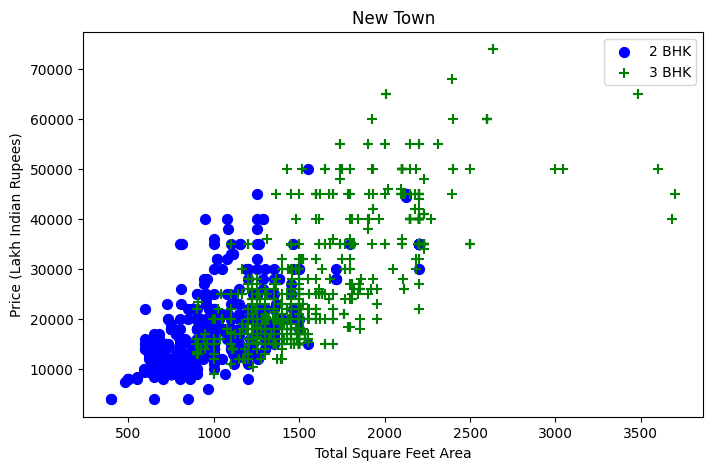

In [ ]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df5,location):
    bhk2 = df5[(df5.locality==location) & (df5.bedroom==2)]
    bhk3 = df5[(df5.locality==location) & (df5.bedroom==3)]
    plt.figure(figsize=(8, 5))
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df5,"New Town")

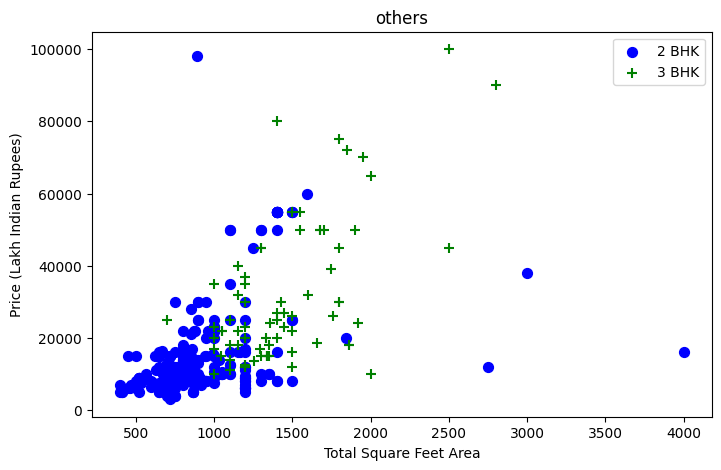

In [ ]:
plot_scatter_chart(df5,"others")

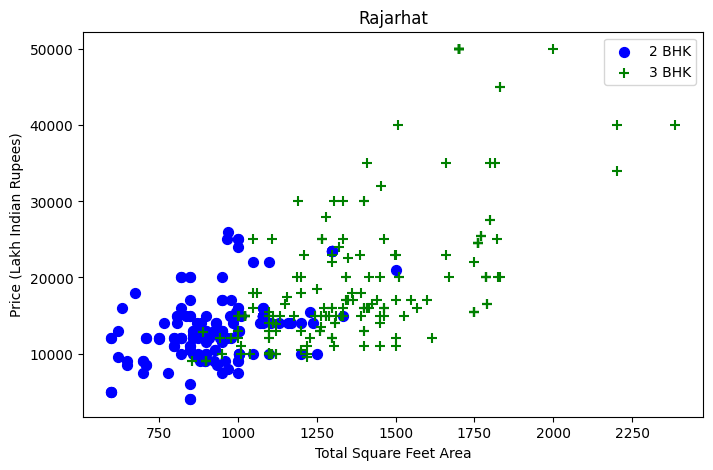

In [ ]:
plot_scatter_chart(df5,"Rajarhat")

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
tts=train_test_split

In [ ]:
df6.head()

,bedroom,price,area,bathroom_numeric,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Studio Apartment,property_type_Villa,locality_Action Area I,...,locality_birati,locality_deshbandhu nagar,locality_kalikapura,locality_others,locality_sahakara nagar,locality_salt lake sec iii,locality_south dum dum,furnish_type_Furnished,furnish_type_Semi-Furnished,furnish_type_Unfurnished
0,2,6000.0,600,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,4000.0,150,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,6500.0,350,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,150000.0,6500,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,26000.0,1200,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df6.price.value_counts()

,count
price,
10000.0,564
15000.0,536
12000.0,465
8000.0,378
16000.0,355
...,...
29400.0,1
5340.0,1
11200.0,1


In [ ]:
X=df6.drop(["price"], axis="columns")
y=df6.price

In [ ]:
df6.shape

(9448, 179)

In [ ]:
X.shape

(9448, 178)

In [ ]:
y.shape

(9448,)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.6568254755291932

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer  # For discretization

# Discretize 'y_train' into bins for classification
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_train_discretized = discretizer.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()  # Reshape and convert to integers

# Instantiate the model
random_forest = RandomForestClassifier()

# Cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Cross-validation score for Random Forest Classifier
rf_scores = cross_val_score(random_forest, X, y_train_discretized, cv=cv)

print("Random Forest Classifier Mean Score:", rf_scores.mean())


Random Forest Classifier Mean Score: 0.7446560846560846


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor  # Import Regressor instead of Classifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_random_forest_model_using_gridsearchcv(X, y):
    # Define the Random Forest model and its parameters
    rf_params = {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }

    # Create the Random Forest model - Use Regressor for continuous target
    rf_model = RandomForestRegressor()

    # Set up ShuffleSplit for cross-validation
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Create a GridSearchCV object
    gs = GridSearchCV(rf_model, rf_params, cv=cv, return_train_score=False)

    # Fit the model
    gs.fit(X, y)

    # Prepare results
    results = {
        'model': 'Random Forest',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

    # Return results as a DataFrame
    return pd.DataFrame([results], columns=['model', 'best_score', 'best_params'])

# Assuming X and y are your features and target variable
results_df = find_best_random_forest_model_using_gridsearchcv(X, y)
print(results_df)

           model  best_score  \
0  Random Forest    0.836102   

                                         best_params  
0  {'max_depth': 20, 'min_samples_split': 2, 'n_e...  


In [ ]:
rf_regressor = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    min_samples_split=2
)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10)

In [ ]:
model.score(X_test, y_test)

0.9454719982261304

In [ ]:
model = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    min_samples_split=2
)

# Fit the model to the training data
model.fit(X, y)

RandomForestRegressor(max_depth=20, n_estimators=10)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=10, max_depth=20, min_samples_split=2))
])

model.fit(X_train, y_train)

def get_user_input():
    bedroom = int(input("Enter number of bedrooms: "))
    area = float(input("Enter area in square feet: "))
    bathroom_numeric = int(input("Enter number of bathrooms: "))

    property_type_apartment = int(input("Is it an Apartment? (1 for Yes, 0 for No): "))
    property_type_independent_floor = int(input("Is it an Independent Floor? (1 for Yes, 0 for No): "))
    property_type_independent_house = int(input("Is it an Independent House? (1 for Yes, 0 for No): "))
    property_type_studio_apartment = int(input("Is it a Studio Apartment? (1 for Yes, 0 for No): "))
    property_type_villa = int(input("Is it a Villa? (1 for Yes, 0 for No): "))

    locality_input = input("Enter locality (choose from the listed localities): ").strip()

    print("Choose furnishing type:")
    print("1: Furnished")
    print("2: Semi-Furnished")
    print("3: Unfurnished")

    furnishing_choice = int(input("Enter your choice (1, 2, or 3): "))

    if furnishing_choice == 1:
        furnish_type_furnished = 1
        furnish_type_semi_furnished = 0
        furnish_type_unfurnished = 0
    elif furnishing_choice == 2:
        furnish_type_furnished = 0
        furnish_type_semi_furnished = 1
        furnish_type_unfurnished = 0
    elif furnishing_choice == 3:
        furnish_type_furnished = 0
        furnish_type_semi_furnished = 0
        furnish_type_unfurnished = 1
    else:
        print("Invalid choice. Setting all furnishing types to 0.")
        furnish_type_furnished = 0
        furnish_type_semi_furnished = 0
        furnish_type_unfurnished = 0

    user_input = pd.DataFrame({
        'bedroom': [bedroom],
        'area': [area],
        'bathroom_numeric': [bathroom_numeric],
        'property_type_Apartment': [property_type_apartment],
        'property_type_Independent Floor': [property_type_independent_floor],
        'property_type_Independent House': [property_type_independent_house],
        'property_type_Studio Apartment': [property_type_studio_apartment],
        'property_type_Villa': [property_type_villa],
        'locality': [locality_input],
        'furnish_type_Furnished': [furnish_type_furnished],
        'furnish_type_Semi-Furnished': [furnish_type_semi_furnished],
        'furnish_type_Unfurnished': [furnish_type_unfurnished]
    })

    user_input = pd.get_dummies(user_input, columns=['locality'], prefix=['locality'], drop_first=False)

    missing_cols = set(model.feature_names_in_) - set(user_input.columns)
    for col in missing_cols:
        user_input[col] = 0

    user_input = user_input[model.feature_names_in_]

    return user_input

user_data = get_user_input()
predicted_rent = model.predict(user_data)

print(f"The predicted rent:", predicted_rent[0])

Enter number of bedrooms: 3
Enter area in square feet: 2500
Enter number of bathrooms: 2
Is it an Apartment? (1 for Yes, 0 for No): 0
Is it an Independent Floor? (1 for Yes, 0 for No): 1
Is it an Independent House? (1 for Yes, 0 for No): 1
Is it a Studio Apartment? (1 for Yes, 0 for No): 0
Is it a Villa? (1 for Yes, 0 for No): 1
Enter locality (choose from the listed localities): Elgin
Choose furnishing type:
1: Furnished
2: Semi-Furnished
3: Unfurnished
Enter your choice (1, 2, or 3): 2
The predicted rent: 42600.0


<ipython-input-149-9813a08c2b8c>:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_input[col] = 0
<ipython-input-149-9813a08c2b8c>:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_input[col] = 0
<ipython-input-149-9813a08c2b8c>:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_input[c